In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
df=pd.read_csv('Expanded_data_with_more_features.csv')

In [319]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [320]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [322]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#Drop unnamed Column

In [323]:
df=df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


#Gender Distribution

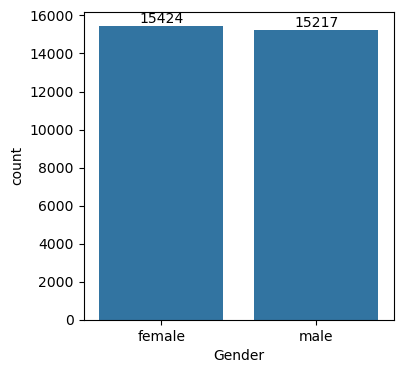

In [324]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

#No of Females > No of males

In [325]:
gb=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


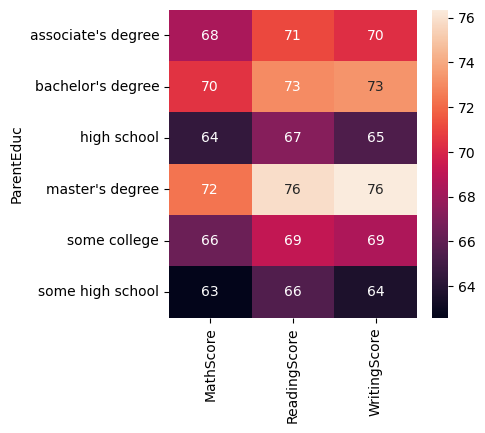

In [326]:
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True)
plt.show()

#Education of parents has a good impact on students Marks

In [327]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


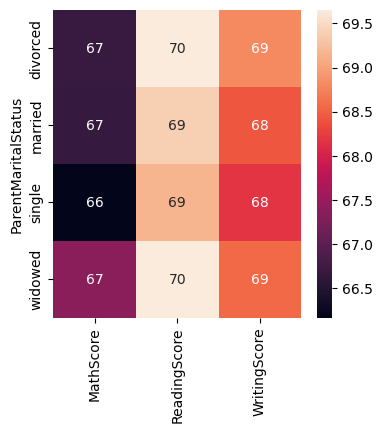

In [328]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1,annot=True)
plt.show()

In [329]:
#From above chart we don't have a bigger impact on student  

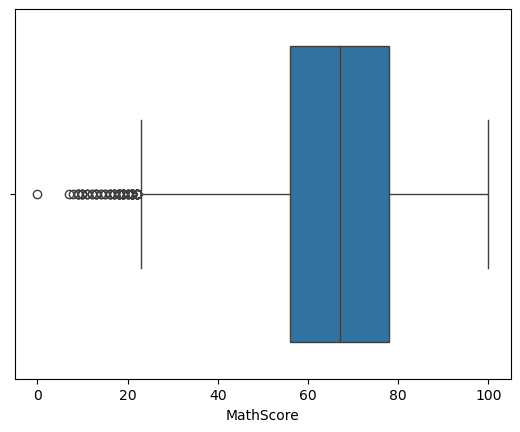

In [330]:
sns.boxplot(data=df,x="MathScore")
plt.show()

In [331]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


#Distribution of Ethnic Groups

In [332]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


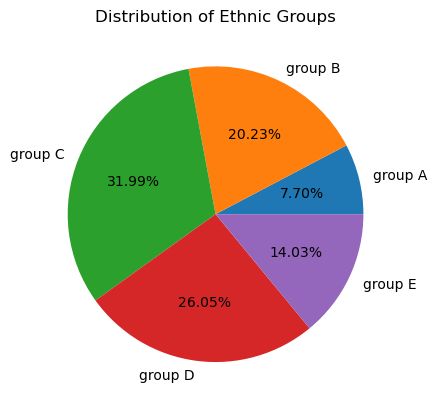

In [333]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()
l=["group A","group B","group C","group D","group E"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist, labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

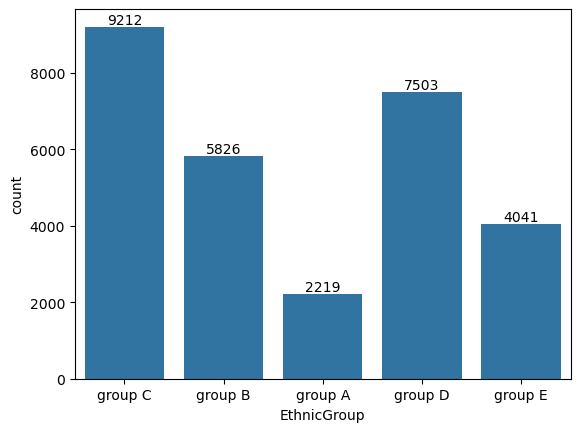

In [334]:
ax=sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])

In [335]:
# Define at-risk students as those scoring < 40 in at least 2 subjects
at_risk = df[(df['MathScore'] < 40) & (df['ReadingScore'] < 40) |
             (df['MathScore'] < 40) & (df['WritingScore'] < 40) |
             (df['ReadingScore'] < 40) & (df['WritingScore'] < 40)]

print("Number of at-risk students:", len(at_risk))
at_risk.head()


Number of at-risk students: 804


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
56,male,group A,some high school,free/reduced,none,married,sometimes,yes,NaN,school_bus,5 - 10,39,39,34
60,male,group D,some high school,free/reduced,none,married,sometimes,yes,4.0,school_bus,5 - 10,45,37,37
69,male,group E,some high school,standard,none,NaN,sometimes,no,5.0,school_bus,5 - 10,28,25,21


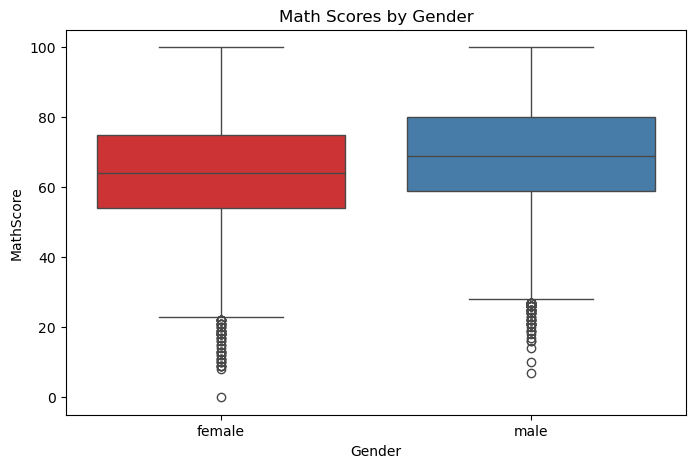

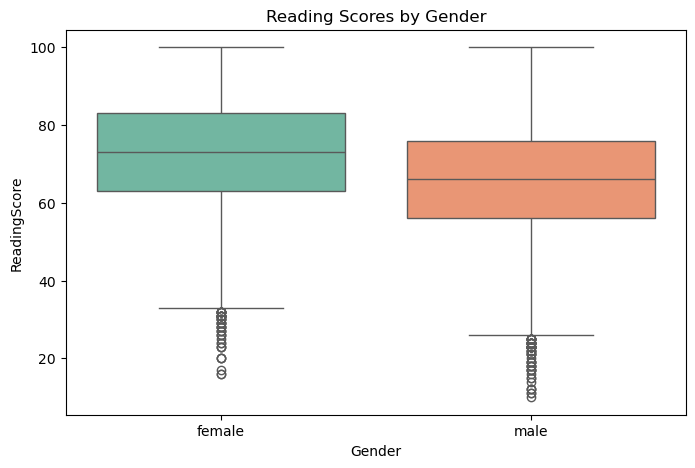

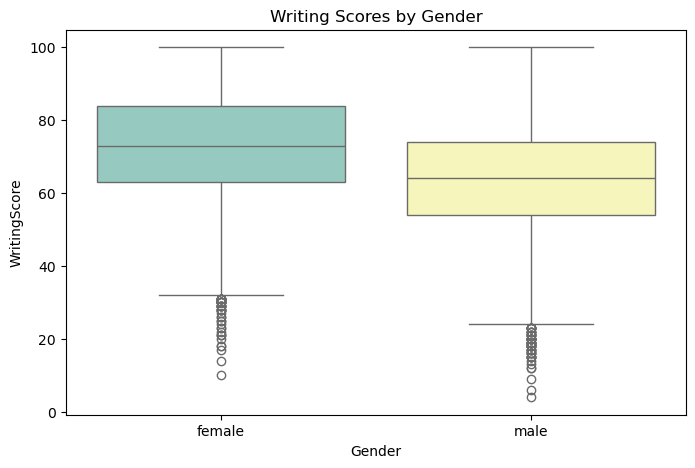

In [336]:
# Math Scores by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="MathScore", data=df, hue="Gender", palette="Set1", legend=False)
plt.title("Math Scores by Gender")
plt.show()

# Reading Scores by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="ReadingScore", data=df, hue="Gender", palette="Set2", legend=False)
plt.title("Reading Scores by Gender")
plt.show()

# Writing Scores by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="WritingScore", data=df, hue="Gender", palette="Set3", legend=False)
plt.title("Writing Scores by Gender")
plt.show()


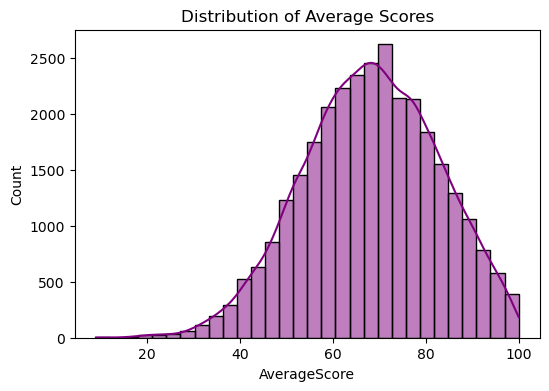

In [337]:
df["TotalScore"] = df["MathScore"] + df["ReadingScore"] + df["WritingScore"]
df["AverageScore"] = df["TotalScore"] / 3

plt.figure(figsize=(6,4))
sns.histplot(df["AverageScore"], kde=True, bins=30, color="purple")
plt.title("Distribution of Average Scores")
plt.show()


In [338]:
top_students = df[df["AverageScore"] >= df["AverageScore"].quantile(0.95)]
low_students = df[df["AverageScore"] <= df["AverageScore"].quantile(0.05)]

print("Top students:\n", top_students.head())
print("Low-performing students:\n", low_students.head())


Top students:
      Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
95     male         NaN        some college      standard  completed   
97   female     group D     master's degree      standard       none   
105  female     group E   bachelor's degree      standard  completed   
113  female     group C        some college      standard  completed   
138    male     group E  associate's degree  free/reduced  completed   

    ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
95              married     regularly          yes         1.0     school_bus   
97              married     sometimes           no         3.0        private   
105             married     regularly          yes         3.0     school_bus   
113              single     regularly          yes         1.0            NaN   
138             married     regularly           no         3.0        private   

    WklyStudyHours  MathScore  ReadingScore  WritingScore  TotalS

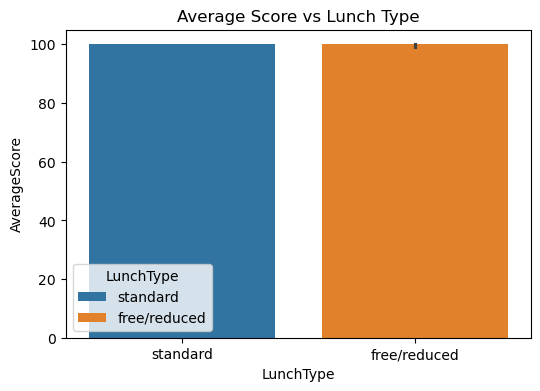

In [339]:
plt.figure(figsize=(6,4))
sns.barplot(x="LunchType", y="AverageScore", data=df, estimator=np.max,hue="LunchType",legend=True)
plt.title("Average Score vs Lunch Type")
plt.show()


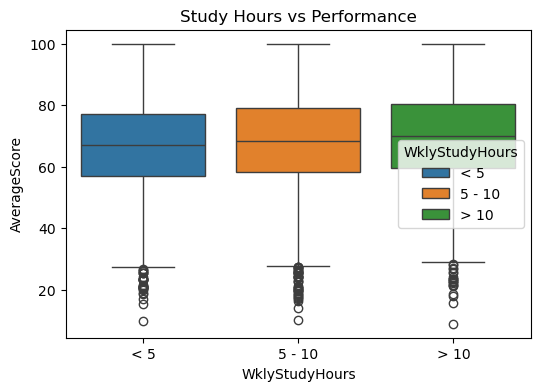

In [340]:
plt.figure(figsize=(6,4))
sns.boxplot(x="WklyStudyHours", y="AverageScore", data=df,hue="WklyStudyHours",legend=True)
plt.title("Study Hours vs Performance")
plt.show()

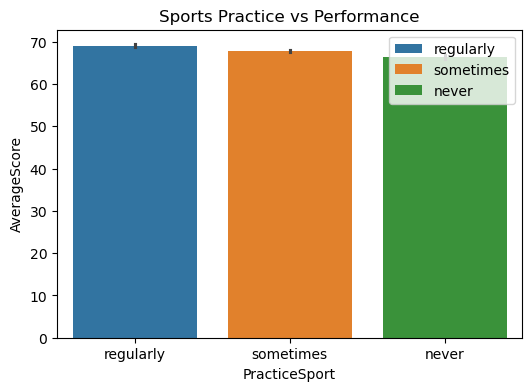

In [341]:
plt.figure(figsize=(6,4))
sns.barplot(x="PracticeSport", y="AverageScore", data=df, estimator=np.mean,hue="PracticeSport",legend=True)
plt.title("Sports Practice vs Performance")
plt.legend(loc="upper right")
plt.show()

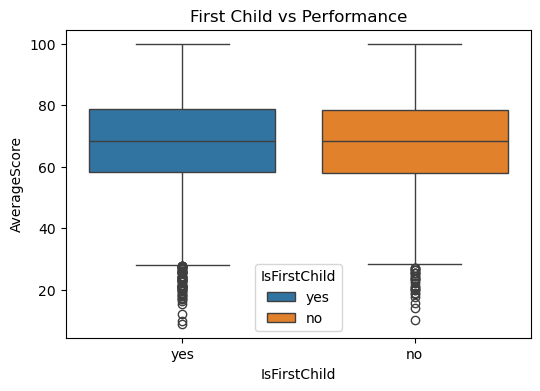

In [342]:
plt.figure(figsize=(6,4))
sns.boxplot(x="IsFirstChild", y="AverageScore", data=df,hue="IsFirstChild",legend=True)
plt.title("First Child vs Performance")
plt.show()

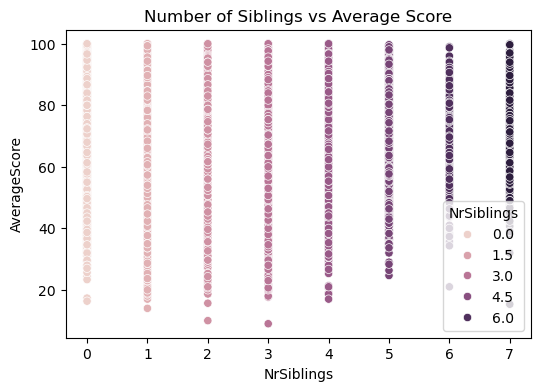

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="NrSiblings", y="AverageScore", data=df,hue="NrSiblings")
plt.title("Number of Siblings vs Average Score")
plt.show()

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select numerical + categorical features
X = df[["ReadingScore", "WritingScore"]]   # predictors
y = df["MathScore"]                        # target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.6733230650973001
